In [2]:
!pip install -q minisom

Punto 0 (original: [0.25926374 0.14820209]) -> Cluster 8
  Coordenadas en el mapa: (2, 2)
Punto 1 (original: [0.86618356 0.85348172]) -> Cluster 0
  Coordenadas en el mapa: (0, 0)
Punto 2 (original: [0.48258392 0.5277753 ]) -> Cluster 5
  Coordenadas en el mapa: (1, 2)
Punto 3 (original: [0.53271153 0.5581704 ]) -> Cluster 4
  Coordenadas en el mapa: (1, 1)
Punto 4 (original: [0.18910687 0.06542085]) -> Cluster 8
  Coordenadas en el mapa: (2, 2)
Punto 5 (original: [0.92804647 0.89604069]) -> Cluster 1
  Coordenadas en el mapa: (0, 1)
Punto 6 (original: [0.50822675 0.51536783]) -> Cluster 5
  Coordenadas en el mapa: (1, 2)
Punto 7 (original: [0.53959758 0.62371069]) -> Cluster 4
  Coordenadas en el mapa: (1, 1)
Punto 8 (original: [0.90735701 0.85444499]) -> Cluster 1
  Coordenadas en el mapa: (0, 1)
Punto 9 (original: [0.57063895 0.5070543 ]) -> Cluster 2
  Coordenadas en el mapa: (0, 2)
Punto 10 (original: [0.59133847 0.63740429]) -> Cluster 4
  Coordenadas en el mapa: (1, 1)
Punto 11 

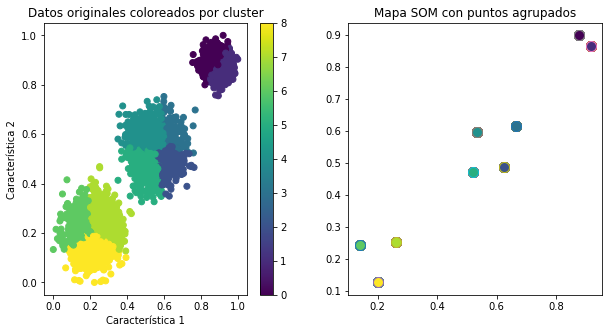

In [19]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

N_SAMPLES = 5000
RANDOM_STATE = 42
data, y = make_blobs(
    n_samples=N_SAMPLES,
    cluster_std=[1.0, 1.0, 0.5],
    centers=[(-5, -5), (0, 0), (5, 5)],
    random_state=RANDOM_STATE,
)

# Normalizar los datos
data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

# Crear y entrenar el SOM
som = MiniSom(x=3, y=3, input_len=2, sigma=0.5, learning_rate=0.5)
som.random_weights_init(data)
som.train_random(data, 1000)

# Obtener el winner (BMU) para cada punto
winners = np.array([som.winner(x) for x in data])

# Separar las coordenadas x e y
winner_coordinates = np.array(winners)
x_coords = winner_coordinates[:, 0]
y_coords = winner_coordinates[:, 1]

# Convertir las coordenadas en etiquetas de cluster (0 a 8 para un mapa 3x3)
clusters = x_coords * 3 + y_coords

# Visualizar los resultados
plt.figure(figsize=(10, 5))

# Subplot 1: Mostrar puntos originales coloreados por cluster
plt.subplot(1, 2, 1)
scatter = plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('Datos originales coloreados por cluster')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Subplot 2: Mostrar el mapa SOM con los puntos
plt.subplot(1, 2, 2)
for i in range(som.get_weights().shape[0]):
    for j in range(som.get_weights().shape[1]):
        plt.plot(som.get_weights()[i, j, 0], som.get_weights()[i, j, 1], 'k.', markersize=15)
        
for i, x in enumerate(data):
    w = som.winner(x)
    plt.plot(som.get_weights()[w[0], w[1], 0], 
             som.get_weights()[w[0], w[1], 1], 
             'o', markersize=10, 
             markerfacecolor=plt.cm.viridis(clusters[i]/max(clusters)))
plt.title('Mapa SOM con puntos agrupados')

# Diccionario para almacenar los resultados
cluster_assignments_dict = {}

# Obtener las asignaciones de clusters y puntos
for i, (punto, cluster) in enumerate(zip(data, clusters)):
    original_point = punto * (data.max(axis=0) - data.min(axis=0)) + data.min(axis=0)  # Reconstruir el punto original
    cluster_assignments_dict[i] = {
        'original_point': original_point,
        'cluster': cluster,
        'coordinates': (x_coords[i], y_coords[i])
    }

# Imprimir los resultados si lo deseas
for i, assignment in cluster_assignments_dict.items():
    print(f"Punto {i} (original: {assignment['original_point']}) -> Cluster {assignment['cluster']}")
    print(f"  Coordenadas en el mapa: {assignment['coordinates']}")


In [20]:
# Crear la matriz para el heatmap (0s por defecto)
heatmap_data = np.zeros((len(data), len(np.unique(clusters))))

# Rellenar la matriz con 1s donde el punto pertenece al cluster
for i, cluster in enumerate(clusters):
    heatmap_data[i, cluster] = 1  # 1 indica que el punto pertenece a ese cluster

# Crear el gráfico de Plotly
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data,  # La matriz de clusters
    colorscale='Viridis',  # Colormap para el heatmap
    colorbar=dict(title="Cluster"),  # Leyenda del color
    x=[f"Cluster {i}" for i in range(len(np.unique(clusters)))],  # Etiquetas de los clusters en el eje X
    y=[f"Punto {i}" for i in range(len(data))],  # Etiquetas de los puntos en el eje Y
    showscale=True  # Mostrar la escala de colores
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title="Heatmap de Clustering de Puntos",
    xaxis_title="Clusters",
    yaxis_title="Puntos",
    showlegend=False
)

# Mostrar el gráfico
fig.show()

Punto 0 (original: [-73.49221058 -93.63766654]) -> Cluster 1
  Coordenadas en el mapa: (0, 1)
Punto 1 (original: [61.79244452 59.92259024]) -> Cluster 5
  Coordenadas en el mapa: (1, 2)
Punto 2 (original: [-23.71332171 -10.99334012]) -> Cluster 2
  Coordenadas en el mapa: (0, 2)
Punto 3 (original: [-12.53969321  -4.37542788]) -> Cluster 2
  Coordenadas en el mapa: (0, 2)
Punto 4 (original: [ -89.13043364 -111.66159322]) -> Cluster 1
  Coordenadas en el mapa: (0, 1)
Punto 5 (original: [75.58191549 69.18893801]) -> Cluster 8
  Coordenadas en el mapa: (2, 2)
Punto 6 (original: [-17.99744145 -13.69481401]) -> Cluster 4
  Coordenadas en el mapa: (1, 1)
Punto 7 (original: [-11.00476762   9.89463476]) -> Cluster 2
  Coordenadas en el mapa: (0, 2)
Punto 8 (original: [70.97015838 60.13232146]) -> Cluster 5
  Coordenadas en el mapa: (1, 2)
Punto 9 (original: [ -4.08553369 -15.50491703]) -> Cluster 4
  Coordenadas en el mapa: (1, 1)
Punto 10 (original: [ 0.52846654 12.87613587]) -> Cluster 7
  Co

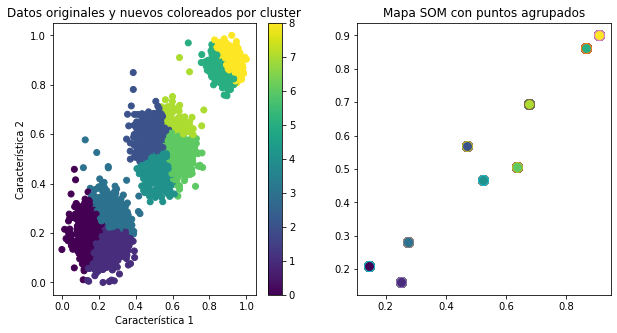

In [25]:
# Generar nuevos datos (data2)
X_new, y_new = make_blobs(
    n_samples=10,
    centers=[(-7, -1), (-2, 4), (3, 6)],
    random_state=RANDOM_STATE,
)

N_SAMPLES = 5000
RANDOM_STATE = 42
X, y = make_blobs(
    n_samples=N_SAMPLES,
    cluster_std=[1.0, 1.0, 0.5],
    centers=[(-5, -5), (0, 0), (5, 5)],
    random_state=RANDOM_STATE,
)

# Concatenar los datos antiguos con los nuevos
data = np.vstack([X, X_new])

# Normalizar los datos combinados
X_combined = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

# Crear y entrenar el SOM con los datos combinados
som = MiniSom(x=3, y=3, input_len=2, sigma=0.5, learning_rate=0.5)
som.random_weights_init(X_combined)
som.train_random(X_combined, 1000)

# Obtener el winner (BMU) para cada punto en los datos combinados
winners = np.array([som.winner(x) for x in X_combined])

# Separar las coordenadas x e y
winner_coordinates = np.array(winners)
x_coords = winner_coordinates[:, 0]
y_coords = winner_coordinates[:, 1]

# Convertir las coordenadas en etiquetas de cluster (0 a 8 para un mapa 3x3)
clusters = x_coords * 3 + y_coords

# Visualizar los resultados
plt.figure(figsize=(10, 5))

# Subplot 1: Mostrar puntos originales y nuevos coloreados por cluster
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_combined[:, 0], X_combined[:, 1], c=clusters, cmap='viridis')
plt.colorbar(scatter)
plt.title('Datos originales y nuevos coloreados por cluster')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Subplot 2: Mostrar el mapa SOM con los puntos
plt.subplot(1, 2, 2)
for i in range(som.get_weights().shape[0]):
    for j in range(som.get_weights().shape[1]):
        plt.plot(som.get_weights()[i, j, 0], som.get_weights()[i, j, 1], 'k.', markersize=15)
        
for i, x in enumerate(X_combined):
    w = som.winner(x)
    plt.plot(som.get_weights()[w[0], w[1], 0], 
             som.get_weights()[w[0], w[1], 1], 
             'o', markersize=10, 
             markerfacecolor=plt.cm.viridis(clusters[i]/max(clusters)))
plt.title('Mapa SOM con puntos agrupados')

# Diccionario para almacenar los resultados
cluster_assignments_dict = {}

# Obtener las asignaciones de clusters y puntos
for i, (punto, cluster) in enumerate(zip(data, clusters)):
    original_point = punto * (data.max(axis=0) - data.min(axis=0)) + data.min(axis=0)  # Reconstruir el punto original
    cluster_assignments_dict[i] = {
        'original_point': original_point,
        'cluster': cluster,
        'coordinates': (x_coords[i], y_coords[i])
    }

# Imprimir los resultados si lo deseas
for i, assignment in cluster_assignments_dict.items():
    print(f"Punto {i} (original: {assignment['original_point']}) -> Cluster {assignment['cluster']}")
    print(f"  Coordenadas en el mapa: {assignment['coordinates']}")
